In [74]:
import os
import glob

import numpy as np
import datetime

import matplotlib.pyplot as plt

import struct

import pandas as pd

In [75]:
def convert_timestamp_to_utc(seconds, microseconds):
    # Create a datetime object from the seconds since epoch in UTC
    timestamp = datetime.datetime.utcfromtimestamp(seconds)
    
    # Add the microseconds part to the timestamp
    timestamp_with_microseconds = timestamp + datetime.timedelta(microseconds=microseconds)
    
    # Return the formatted datetime in UTC with microseconds
    return timestamp_with_microseconds.strftime('%Y-%m-%d %H:%M:%S.%f')

In [80]:
def read_pcap(file_path):
    with open(file_path, 'rb') as f:
        # Read the global header (24 bytes)
        global_header = f.read(24)
        magic_number, version_major, version_minor, this_zone, sigfigs, snap_len, link_type = struct.unpack('<IHHIIII', global_header)

        print("PCAP Global Header Information:")
        print(f"Magic Number: {hex(magic_number)}")
        print(f"Version: {version_major}.{version_minor}")
        print(f"Timezone: {this_zone}")
        print(f"Snapshot Length: {snap_len}")
        print(f"Link Type: {link_type}")

        # Now, read each packet's header and payload
        packet_count = 0
        while True:
            packet_header = f.read(16)
            if len(packet_header) < 16:
                break  # End of file or incomplete packet
            
            # Unpack the packet header (16 bytes)
            ts_sec, ts_usec, captured_len, packet_len = struct.unpack('<IIII', packet_header)
            
            # Convert timestamp to UTC
            timestamp_utc = convert_timestamp_to_utc(ts_sec, ts_usec)
            
            # Print packet header details
            print(f"\nPacket {packet_count + 1}:")
            print(f"Timestamp (UTC): {timestamp_utc}")
            print(f"Captured Length: {captured_len} bytes")
            print(f"Original Packet Length: {packet_len} bytes")

            # Read the payload (captured data)
            payload = f.read(captured_len)
            print(f"Payload (first 16 bytes): {payload[:16]}")

            packet_count += 1

In [81]:
# Example usage
file_path = 'zpectro_fc800Mhz_v6.pcap'  # Replace with your PCAP file path
read_pcap(file_path)

PCAP Global Header Information:
Magic Number: 0xa1b2c3d4
Version: 2.4
Timezone: 0
Snapshot Length: 262144
Link Type: 1

Packet 1:
Timestamp (UTC): 2025-02-19 18:55:18.476607
Captured Length: 8330 bytes
Original Packet Length: 8330 bytes
Payload (first 16 bytes): b'\x1c\xfd\x08}X\x99\x06P\x02\x0f\x03\x01\x08\x00E\x00'

Packet 2:
Timestamp (UTC): 2025-02-19 18:55:18.476638
Captured Length: 8330 bytes
Original Packet Length: 8330 bytes
Payload (first 16 bytes): b'\x1c\xfd\x08}X\x99\x06P\x02\x0f\x03\x01\x08\x00E\x00'

Packet 3:
Timestamp (UTC): 2025-02-19 18:55:18.476643
Captured Length: 8330 bytes
Original Packet Length: 8330 bytes
Payload (first 16 bytes): b'\x1c\xfd\x08}X\x99\x06P\x02\x0f\x03\x01\x08\x00E\x00'

Packet 4:
Timestamp (UTC): 2025-02-19 18:55:18.476649
Captured Length: 8330 bytes
Original Packet Length: 8330 bytes
Payload (first 16 bytes): b'\x1c\xfd\x08}X\x99\x06P\x02\x0f\x03\x01\x08\x00E\x00'

Packet 5:
Timestamp (UTC): 2025-02-19 18:55:18.476659
Captured Length: 8330 byte

In [82]:
header_number_bytes = 24 #bytes
payload_number_bytes = 8330 #bytes
timestamp_number_bytes = 16 #bytes
number_of_packets = 2048

total_bytes = header_number_bytes + (payload_number_bytes + timestamp_number_bytes) * number_of_packets
print("total bytes in the pcap: ", total_bytes)

total bytes in the pcap:  17092632


In [31]:
pcapfiles=sorted(glob.glob('*.pcap'))

In [32]:
print(pcapfiles, len(pcapfiles))

['zpectro_fc800Mhz_v6.pcap'] 1


In [33]:
esse=pcapfiles[0]
print(esse)
with open(esse,'rb') as f:
    mybuff=f.read()

#o zspectro está com banda de 93.75 MHz e 32768 canais

zpectro_fc800Mhz_v6.pcap


In [83]:
#mostrar tamanho em bytes (8 bits)
print("Size of pcap file in bytes: ", len(mybuff))
#mostrar em formato binário (scary!) 
print(mybuff[:60])
#mostrar em formato hexdecimal (less scary!)
print(mybuff[:60].hex())

Size of pcap file in bytes:  17092632
b'\xd4\xc3\xb2\xa1\x02\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x00\x00\x00\x16)\xb6g\xbfE\x07\x00\x8a \x00\x00\x8a \x00\x00\x1c\xfd\x08}X\x99\x06P\x02\x0f\x03\x01\x08\x00E\x00 |\x00\x00'
d4c3b2a102000400000000000000000000000400010000001629b667bf4507008a2000008a2000001cfd087d58990650020f030108004500207c0000


In [35]:
"""Comments on 24 first elements of the pcap.

The total size of the PCAP Global Header is 24 bytes.

1. Magic Number: 4 bytes

This is a constant value (0xA1B2C3D4 for standard PCAP files or 0x0A0D0D0A for PCAP-NG).

2. Version Major: 2 bytes

The major version number of the PCAP file format (typically 2).

3. Version Minor: 2 bytes

The minor version number of the PCAP file format (typically 4).

4. ThisZone: 4 bytes

Time zone offset in seconds from UTC (usually 0 for UTC).

5. Sigfigs: 4 bytes

The number of significant figures in the timestamp (typically 0).

6. SnapLen: 4 bytes

The maximum number of bytes to capture for each packet (i.e., snapshot length).

7. LinkType: 4 bytes

The type of link-layer protocol used in the capture (e.g., Ethernet, Wi-Fi).

"""

'Comments on 24 first elements of the pcap.\n\nThe total size of the PCAP Global Header is 24 bytes.\n\n1. Magic Number: 4 bytes\n\nThis is a constant value (0xA1B2C3D4 for standard PCAP files or 0x0A0D0D0A for PCAP-NG).\n\n2. Version Major: 2 bytes\n\nThe major version number of the PCAP file format (typically 2).\n\n3. Version Minor: 2 bytes\n\nThe minor version number of the PCAP file format (typically 4).\n\n4. ThisZone: 4 bytes\n\nTime zone offset in seconds from UTC (usually 0 for UTC).\n\n5. Sigfigs: 4 bytes\n\nThe number of significant figures in the timestamp (typically 0).\n\n6. SnapLen: 4 bytes\n\nThe maximum number of bytes to capture for each packet (i.e., snapshot length).\n\n7. LinkType: 4 bytes\n\nThe type of link-layer protocol used in the capture (e.g., Ethernet, Wi-Fi).\n\n'

In [36]:
dt = np.dtype('int8')

# Read the PCAP buffer starting from the 24th byte onward
coisa_int8 = np.frombuffer(mybuff, dt)
newcoisa_int8 = coisa_int8[:24]  # Extract the relevant part of the buffer

# Define the PCAP global header structure in terms of the number of bytes for each field
# Magic number (4 bytes), Version (2 bytes), Timezone offset (4 bytes), etc.
magic_number = int.from_bytes(newcoisa_int8[0:4], byteorder='little')  # 4 bytes
version_major = int.from_bytes(newcoisa_int8[4:6], byteorder='little')  # 2 bytes
version_minor = int.from_bytes(newcoisa_int8[6:8], byteorder='little')  # 2 bytes
this_zone = int.from_bytes(newcoisa_int8[8:12], byteorder='little')  # 4 bytes
sigfigs = int.from_bytes(newcoisa_int8[12:16], byteorder='little')  # 4 bytes
snap_len = int.from_bytes(newcoisa_int8[16:20], byteorder='little')  # 4 bytes
link_type = int.from_bytes(newcoisa_int8[20:24], byteorder='little')  # 4 bytes

# Print the parsed fields in a human-readable format
print("PCAP Global Header:")
print(f"Magic Number: {hex(magic_number)}")
print(f"Version Major: {version_major}")
print(f"Version Minor: {version_minor}")
print(f"Time Zone Offset (ThisZone): {this_zone}")
print(f"Significant Figures (Sigfigs): {sigfigs}")
print(f"Snapshot Length (SnapLen): {snap_len}")
print(f"Link Type: {link_type}")

PCAP Global Header:
Magic Number: 0xa1b2c3d4
Version Major: 2
Version Minor: 4
Time Zone Offset (ThisZone): 0
Significant Figures (Sigfigs): 0
Snapshot Length (SnapLen): 262144
Link Type: 1


In [67]:
"""
Transformar em um np.array formado de int8 o array acima para manter a quantidade de números.
Isso vai ajudar a manipular o array com os métodos do numpy
Removemos os 24 primeiros elementos, pois é uma espécie de header geral. 
O procedimento será ir descobrindo o que é header geral (comparando com o output do wireshark),
e depois ver o que é header e dados em cada header
"""

dt = np.dtype('int8')
coisa_int8=np.frombuffer(mybuff,dt)
newcoisa_int8=coisa_int8[24:]
print(newcoisa_int8.shape)
print("\n")
print(newcoisa_int8[:100].data.hex())

(17092608,)


1629b667bf4507008a2000008a2000001cfd087d58990650020f030108004500207c00004000ff11513b0a2a000c000000002710000020680000530402060000000b800100000000003c8002000000080000800300000000000080040000000020009011


In [38]:
# fazer um reshape com 8346 e o que sobra é o número de frames.
# Controlamos o número de frames com o flag -c no tcpdump
nn_re=newcoisa_int8.reshape(-1,8346)
print(nn_re.shape)
print(nn_re)
# notar que as colunas iniciais são iguais, implicando algum tipo de header (iguais) de cada frame

(2048, 8346)
[[ 22  41 -74 ...   0   0   0]
 [ 22  41 -74 ...   0   0   0]
 [ 22  41 -74 ...   0   0   0]
 ...
 [ 84  41 -74 ...   0   0   0]
 [ 84  41 -74 ...   0   0   0]
 [ 84  41 -74 ...   0   0   0]]


In [39]:
# retira um header antes dos dados do UDP...o pacote UDP tem 8330 bytes (ou int8) de acordo com o wireshark 
# Daí tem uma parte para ser removida até 8288 e por fim dados mesmo são 8192. 
# Portanto será preciso remover ainda 8330-8192=138 elementos no início de cada frame
new_re=nn_re[:,16:] 
print(new_re.shape)
print(new_re[:10,:10])
print(new_re.flatten()[:148].data.hex())

(2048, 8330)
[[  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]
 [  28   -3    8  125   88 -103    6   80    2   15]]
1cfd087d58990650020f030108004500207c00004000ff11513b0a2a000c000000002710000020680000530402060000000b800100000000003c8002000000080000800300000000000080040000000020009011000000000000901500000000165a9009000000008000904600000a6e49c090270000000000b596000000056d5cec180000000000000000000001000000000000


In [40]:
#138  -> 10

frame_headers=new_re[:,:138]
final_re=new_re[:,138:]
print(final_re.shape)
print(final_re[-25:,:10])
print(final_re.flatten()[:10].data.hex())

(2048, 8192)
[[ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0]]
00000001000000000000


In [41]:
8192*1000/32768

250.0

In [42]:
te1=final_re.reshape(-1)  # pode ser usado o método .flatten().
print(te1.shape)
print(te1[:10])

#te11=np.concatenate((te1,np.zeros(2*8192)))

#t21=te11.reshape(-1,8192)
#print(t21.shape)
# As linhas abaixo é para fazer um check de comparação se o reshape(-1) ou .flatten funciona direito
#te3=te1.reshape(-1,8192)  #just to test and check with final_re
#print(te3.shape)
#te3[:10,:10]

(16777216,)
[0 0 0 1 0 0 0 0 0 0]


In [43]:
# Voltar para bytes
te1_bytes=te1.tobytes()

# caso queira ver em hex.
#te1_hex=te1.data.hex()
#print(te1_hex[:50])

In [44]:
# os dados estão codificados em int16. Agora é para valer:

dt = np.dtype('uint32')
coisa=np.frombuffer(te1_bytes,dt)
print(coisa.shape)

(4194304,)


In [45]:
wf_1=coisa.reshape(-1,)
print(wf_1.shape)

(4194304,)


In [46]:
wf_2=wf_1.flatten()
wf_2[:40]
#print(wf_2.shape)

array([16777216,        0,        0,        0, 16777216,        0,
              0,        0, 16777216,        0,        0,        0,
       16777216,        0,        0,        0, 16777216,        0,
              0,        0, 16777216,        0,        0,        0,
       16777216,        0,        0,        0, 16777216,        0,
              0,        0, 16777216,        0,        0,        0,
       16777216,        0,        0,        0], dtype=uint32)

In [47]:
i0=wf_2[0::4]
i1=wf_2[1::4]

i0.shape

(1048576,)

In [48]:
2**14

16384

In [49]:
i0_n=i0.reshape(-1,32768)
i0_n.shape

(32, 32768)

In [50]:
#o zspectro está com banda de 93.75 MHz e 32768 canais
bw=93.75
fc=800
fi,ff=fc-bw/2, fc+bw/2
freqs=np.linspace(fi,ff,i0_n.shape[1])

ti, tf=0, i0_n.shape[0]
tt=np.linspace(ti,tf,tf)

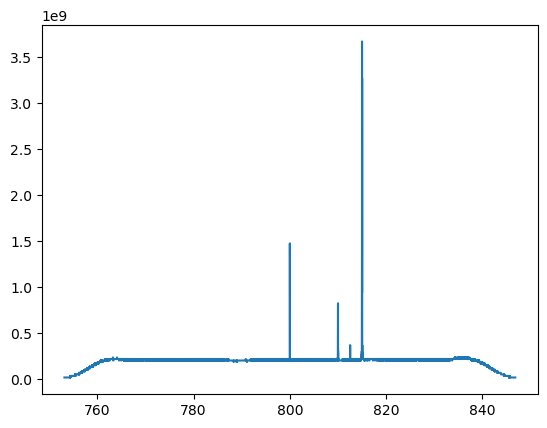

In [51]:
plt.plot(freqs,i0_n[20,:])

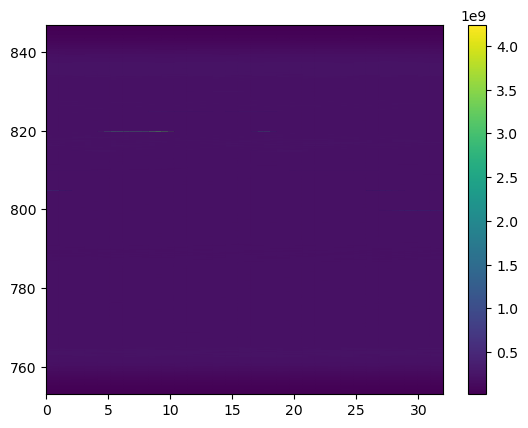

In [52]:
plt.pcolormesh(tt,freqs,i0_n.T,shading='gouraud')
plt.colorbar()

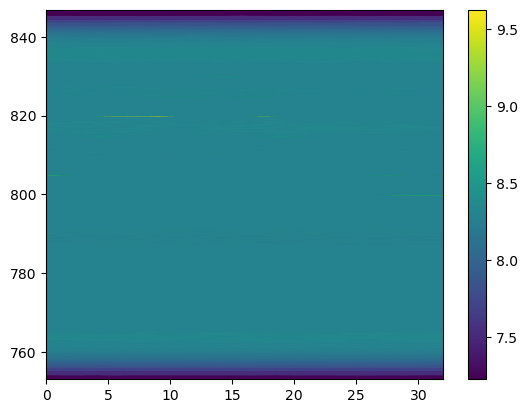

In [53]:
plt.pcolormesh(tt,freqs,np.log10(i0_n.T),shading='gouraud')
plt.colorbar()

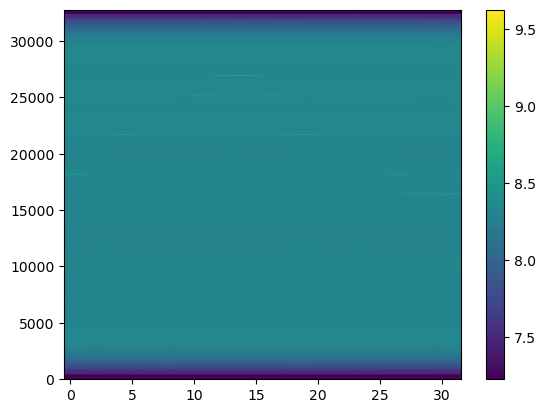

In [54]:
plt.imshow(np.log10(i0_n.T),aspect='auto',origin='lower')
plt.colorbar()

In [55]:
print(i0_n.shape)

(32, 32768)


In [56]:
# média ao longo de alguns canais para combinar em canais maiores

newmat=i0_n.T.reshape(-1,16,32)
print(newmat.shape)
finalmat=np.mean(newmat,axis=1)
print(finalmat.shape)

(2048, 16, 32)
(2048, 32)


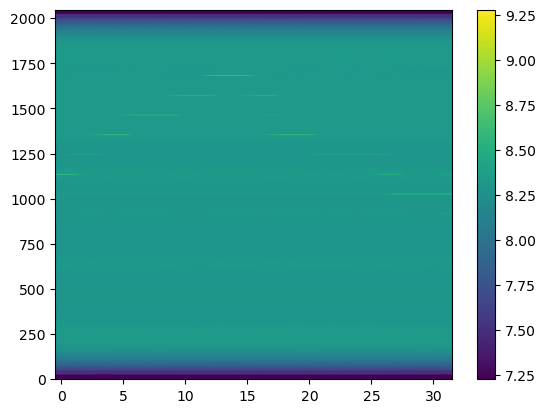

In [57]:
plt.imshow(np.log10(finalmat),aspect='auto',origin='lower')
plt.colorbar()

In [58]:
finalmat.shape

(2048, 32)

In [59]:
# Fazendo uma figura mais bacana

# o que plotar

frqs=np.linspace(fi,ff,finalmat.shape[0])
tts=np.linspace(ti,tf,finalmat.shape[1])

t_series=np.mean(finalmat,axis=0)
specs_mean=np.mean(finalmat,axis=1)

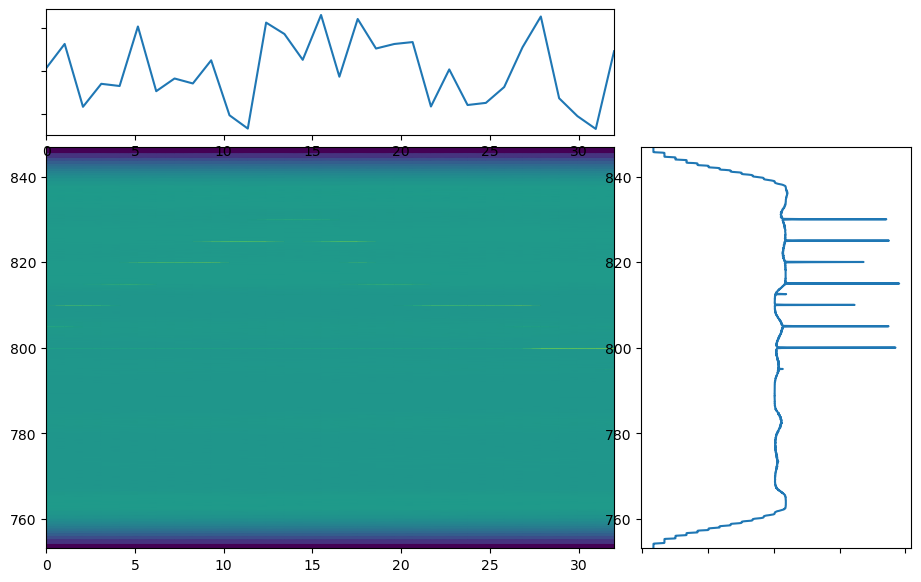

In [60]:

#Montando a grade
fig=plt.figure(figsize=(15,7))
mygrid=plt.GridSpec(4,4,hspace=0.1,wspace=0.1)

main_ax=fig.add_subplot(mygrid[1:,:2])
time_ax=fig.add_subplot(mygrid[0,:2],yticklabels=[],sharex=main_ax)
spec_ax=fig.add_subplot(mygrid[1:,2],xticklabels=[],sharey=main_ax)

#plotando
main_ax.pcolormesh(tts,frqs,np.log10(finalmat),shading='gouraud')

time_ax.plot(tts,t_series)
spec_ax.plot(specs_mean,frqs)

#plt.savefig('zspec_skarab.png')

In [61]:
print(frame_headers.shape)
frame_headers[:2,:66]

(2048, 138)


array([[  28,   -3,    8,  125,   88, -103,    6,   80,    2,   15,    3,
           1,    8,    0,   69,    0,   32,  124,    0,    0,   64,    0,
          -1,   17,   81,   59,   10,   42,    0,   12,    0,    0,    0,
           0,   39,   16,    0,    0,   32,  104,    0,    0,   83,    4,
           2,    6,    0,    0,    0,   11, -128,    1,    0,    0,    0,
           0,    0,   60, -128,    2,    0,    0,    0,    8,    0,    0],
       [  28,   -3,    8,  125,   88, -103,    6,   80,    2,   15,    3,
           1,    8,    0,   69,    0,   32,  124,    0,    0,   64,    0,
          -1,   17,   81,   59,   10,   42,    0,   12,    0,    0,    0,
           0,   39,   16,    0,    0,   32,  104,    0,    0,   83,    4,
           2,    6,    0,    0,    0,   11, -128,    1,    0,    0,    0,
           0,    0,   60, -128,    2,    0,    0,    0,    8,    0,    0]],
      dtype=int8)

In [62]:
frm_hdr=frame_headers[3,128:].tobytes()
frm_hdr.hex()

'5cec1800000000000000'

In [63]:
128/8

16.0